## Evaluating how difficult random K-SAT problems are
----------

In [2]:
import random
import time
import itertools
import numpy as np
import os
import numpy as np
import json
from tqdm import tqdm
from pysat.solvers import Glucose42, Minicard,Lingeling, Cadical153, Minisat22,MapleChrono, Mergesat3
os.chdir('..') if os.path.split(os.getcwd())[-1] != 'ExploringKSAT' else None
print(os.getcwd()) # Should be ...\ExploringKSAT

from Code.generators import KSAT_Generator
from Code.solvers import brute_force, DPLL, BruteForce
ksg = KSAT_Generator()
#ksg.kcnf_to_cnf(hardest_problem[1]]

C:\Users\shairozs\Documents\Projects\ExploringKSAT


In [3]:
import os
os.chdir('..')
from Code.generators import KSAT_Generator
from Code.solvers import brute_force

ksat_generator = KSAT_Generator()
bg = ksat_generator.random_kcnf(k = 3, n_literals = 3, n_conjuncts=5,dimacs = False)
bg

[{('2', False), ('2', True), ('3', True)},
 {('1', True), ('3', False), ('3', True)},
 {('1', False), ('2', False), ('2', True)},
 {('1', False), ('2', True), ('3', True)},
 {('1', True), ('2', False), ('2', True)}]

In [4]:
def str_to_kcnf(formula):
    '''
    Convert a KSAT formula in string format to CNF format
    '''
    sign = lambda x: int(x[0]) if x[1] else -int(x[0])
    conjuncts = []
    for c in formula:
        conj = list(c)
        conj_formatted = [sign(x) for x in conj]
        conjuncts.append(conj_formatted)

    return(conjuncts)

def kcnf_to_str(formula):
    '''
    Convert a KSAT formula in string format to CNF format
    '''
    sign = lambda x: (str(abs(x)), True) if x>0 else (str(abs(x)), False)
    conjuncts = []
    for c in formula:
        conj = list(c)
        print(conj)
        conj_formatted = [sign(x) for x in conj]
        conjuncts.append(conj_formatted)

    return(conjuncts)


r1 = str_to_kcnf(bg); print(r1)
r2 = kcnf_to_str(r1); print(r2)


[[-2, 2, 3], [3, -3, 1], [-2, -1, 2], [-1, 2, 3], [-2, 2, 1]]
[-2, 2, 3]
[3, -3, 1]
[-2, -1, 2]
[-1, 2, 3]
[-2, 2, 1]
[[('2', False), ('2', True), ('3', True)], [('3', True), ('3', False), ('1', True)], [('2', False), ('1', False), ('2', True)], [('1', False), ('2', True), ('3', True)], [('2', False), ('2', True), ('1', True)]]


In [5]:
def brute_force(cnf):
    # Gather a list of literals in the CNF formula
    literals = []
    for conj in cnf:
            literals += [d for d in conj]
 
    literals = set(literals)
    n = len(literals)
    steps = 0

    # Iterate through possible assignments
    for seq in itertools.product([True,False], repeat=n):
        steps += 1
        
        a = set(zip(literals, seq))

        print(a); break
        if all([bool(set(disj).intersection(a)) for disj in cnf]):
            return True, a, steps
 
    return False, None, steps

In [6]:

ksat_generator = KSAT_Generator()
sample = ksat_generator.random_kcnf(k = 3, n_literals = 10, n_conjuncts=55, dimacs = True)
#sample = [{('A', False), ('B', True)}, {('B', False), ('C', False)}, {('C', True), ('A', False)},
#          {('A', True), ('D', True)}, {('D', False), ('A', True)}]
#print(sample)
print()

bfs = BruteForce()
dpll = DPLL()
ling = Lingeling()

print("Brute force---------------------------")
bfs.append_formula(sample)
sat,model, assigns = bfs.solve()
print("Satisfiable? ", sat)
print("Total assignments tested: ", assigns)
print("Satisfying assignment: ", model)
print()


print("DPLL---------------------------")
dpll.append_formula(sample)
sat,model, assigns = dpll.solve()
print("Satisfiable? ", sat)
print("Total assignments tested: ", assigns)
print("Satisfying assignment: ", model)

print()
print("Ling---------------------------")
ling.append_formula(sample)
sat = ling.solve()
assigns = ling.accum_stats()['propagations']
model2 = ling.get_model()
print("Satisfiable? ", sat)
print("Total assignments tested: ", assigns)
print("Satisfying assignment: ", model2)


Brute force---------------------------
Satisfiable?  True
Total assignments tested:  229
Satisfying assignment:  [-1, 2, 3, -4, 5, 6, 7, -8, 9, 10]

DPLL---------------------------
Satisfiable?  True
Total assignments tested:  11
Satisfying assignment:  [1, 3, -4, 5, 6, 7, 8, 9, 10]

Ling---------------------------
Satisfiable?  True
Total assignments tested:  20
Satisfying assignment:  [1, -2, 3, -4, 5, 6, 7, 8, -9, 10]


In [7]:
truth_vals = [int(model[x]) if model[x]==1 else -1 for x in model]
literals = [int(x) for x in model]
sorted([truth_vals[i]*literals[i] for i in range(len(literals))], key = abs)

IndexError: list index out of range

In [8]:
[ksat_generator.describe_literal(sample, 2)

{'pos_activity': 13,
 'neg_activity': 4,
 'correlations': {0, 2, 5, 6, 7, 8, 9},
 'entanglements': {4, 5, 6}}

$ (\neg A \lor \neg B \lor C)$

In [17]:
bfs.formula

[[2, -2, -1],
 [1, -3, -1],
 [2, -2, 3],
 [2, 1, -2],
 [1, 3, -2],
 [2, -2, -1],
 [1, 2, -2],
 [-2, -3, 3],
 [2, -3, -2],
 [2, 3, -2],
 [-3, -2, -1],
 [2, 1, 3]]

## Time - BFS
------

$ (\neg D \lor A)$

$ D \implies A $

$ \neg A \implies D$

$ (\neg A \lor B) \land (\neg B \lor \neg C) \land (C \lor \neg A) \land (A \lor D) $

$ A \implies B $

$ \neg B \implies \neg A $

$ B \implies \neg C$

$ C \implies \neg B $

$ \neg C \implies \neg A $

$ A \implies C$

$ \neg A \implies D$

$ \neg D \implies \neg A$



In [96]:
import ast

def obfuscate_variable_names(func):
    class NameTransformer(ast.NodeTransformer):
        def __init__(self):
            self.var_count = 0

        def visit_Name(self, node):
            new_name = f"_{self.var_count}"
            self.var_count += 1
            return ast.Name(id=new_name, ctx=node.ctx)

    tree = ast.parse(func)
    transformer = NameTransformer()
    transformed_tree = transformer.visit(tree)
    ast.fix_missing_locations(transformed_tree)
    code = compile(transformed_tree, filename="<ast>", mode="exec")
    exec(code, globals())

def my_function(a, b):
    c = a + b
    return c

fu = '''def my_function(a, b):
    c = a + b
    return c'''
obfuscate_variable_names(fu)

#print(my_function(2, 3)) 

In [200]:
def attempt(formula, model):
        ## Attempt to solve a SAT formula with a proposed model

        resolved_conjuncts = [0]*len(formula)

        
        for c in range(len(formula)):
            ## For each conjunct
            conj = formula[c]
            
            ## Are any of the positive variables true in the model?
            assert len(model)>=max(conj), "Not enough literals provided in model"
            solved_conj = max([model[i-1]==(i>0) for i in conj])

            if solved_conj:
                resolved_conjuncts[c] = 1

        if min(resolved_conjuncts)==1:
            return True

        return False

ksat_generator = KSAT_Generator()
ff = ksat_generator.random_kcnf(k = 3, n_literals = 8, n_conjuncts=3)
print(ff)
sol = [1,1,1, 1, 1, 1, 1, 1, 1, 1]
attempt(ff, sol)

[[-6, 7, 6], [-4, -3, 5], [2, -3]]


True

In [4]:
%%time



brute_force_times = []
dpll_times = []
glucose_times = []
cadical_times = []
ms_times = []
lg_times = []
maple_times = []

MAX_LITERALS = 20 # Total number of literals to check up to
literals = list(range(3,MAX_LITERALS))
trials = 50 # Number of trials for each literal


hardest_problem = {}

for num_literals in tqdm(literals, total = len(literals)):
    
    _brute_force_times = []
    _dpll_times = []
    _glucose_times = []
    _cadical_times = []
    _ms_times = []
    _lg_times = []
    _maple_times = []

    #print(b)
    scalar = 6
    for num_conjuncts in [np.random.randint(num_literals*4,num_literals*scalar) for i in range(trials)]:

        # Sample a random 3SAT clause
        #sample = random_kcnf(n_literals = num_literals, n_conjuncts = num_conjuncts)
        sample = ksg.random_kcnf(n_literals = num_literals, n_conjuncts=num_conjuncts)
        
        # Initialize solver
        g = Glucose42()#warm_start = True)
        c = Minicard()
        ms = Lingeling()
        maple = Mergesat3()
        
        # Covert clauses to proper format
        sample_cnf = ksg.kcnf_to_cnf(sample)
        
        g.append_formula(sample_cnf)
        c.append_formula(sample_cnf)
        ms.append_formula(sample_cnf)
        maple.append_formula(sample_cnf)
        
        ## Time BFS
        if num_literals <= 15:
            start = time.time()
            _,_, assigns = brute_force(sample)
            runtime = time.time() - start
            _brute_force_times.append(assigns)
            #_brute_force_times.append(runtime)
        
        ## Time DPLL
        start = time.time()
        _,answer,assigns = dpll(sample)
        runtime = time.time() - start
        _dpll_times.append(assigns)
        #_dpll_times.append(runtime)
        
        
        ## Time Glucose
        start = time.time()
        result = g.solve()
        runtime = time.time() - start
        _glucose_times.append(g.accum_stats()['propagations'])
        #_glucose_times.append(runtime)
        
        props = g.accum_stats()['propagations']
        if num_literals not in hardest_problem.keys():
            hardest_problem[num_literals] = (sample_cnf, props, result, answer)
        elif hardest_problem[num_literals][1] < props:
            hardest_problem[num_literals] = (sample_cnf, props, result, answer)
            

        ## Time Cadical
        start = time.time()
        c.solve()
        runtime = time.time() - start
        _cadical_times.append(c.accum_stats()['propagations'])
        #_cadical_times.append(runtime)
        
        ## Time Minisat
        start = time.time()
        ms.solve()
        runtime = time.time() - start
        _ms_times.append(ms.accum_stats()['propagations'])
        #_ms_times.append(runtime)
        
        ## Time Maple
        start = time.time()
        maple.solve()
        runtime = time.time() - start
        _maple_times.append(maple.accum_stats()['propagations'])
        #_maple_times.append(runtime)
    
    if num_literals <= 15:
        brute_force_times.append(np.max(_brute_force_times))
    if num_literals <= 20:
        dpll_times.append(np.max(_dpll_times))
        
    glucose_times.append(np.max(_glucose_times))
    cadical_times.append(np.max(_cadical_times))
    ms_times.append(np.max(_ms_times))
    maple_times.append(np.max(_maple_times))

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:30<00:00,  1.77s/it]

CPU times: total: 29.5 s
Wall time: 30.1 s


In [7]:
sample_cnf

[[-14, -9, 19],
 [3, 8, 12],
 [-18, 10, 5],
 [4, -13, 12],
 [-3, 3, 8],
 [1, 18],
 [17, 18, 13],
 [1, 14, 10],
 [-9, 2, 12],
 [1, 2, -19],
 [-3, -9, 17],
 [1, 14, 2],
 [-1, 7, -3],
 [16, 14, 2],
 [9, 12],
 [-7, 15, 5],
 [3, -7, 4],
 [-9, -19, 5],
 [17, 3, -12],
 [7, 13, -5],
 [15, 9, 12],
 [19, 2, -11],
 [17, -19],
 [3, -8, 15],
 [19, 10, -19],
 [18, 2, -16],
 [17, 4, 11],
 [16, -19, 17],
 [6, -2, -12],
 [-14, 3, 5],
 [8, 13, 12],
 [1, 3, 18],
 [19, 8, -12],
 [3, 15],
 [16, -13, 12],
 [7, 9, 4],
 [7, 9, 12],
 [19, 1, 5],
 [6, -6, 11],
 [-7, 18, -5],
 [-3, 3, 5],
 [16, -8, 13],
 [-3, -10, 12],
 [1, 8, 11],
 [6, -4, 13],
 [1, 18, -2],
 [18, 7, 2],
 [16, -3],
 [-1, -18, -7],
 [-14, 9, 11],
 [8, -5, -16],
 [14, 2, -19],
 [-7, 7, 4],
 [-1, 3, 16],
 [6, -10, 7],
 [14, 18, -16],
 [5, -17, -16],
 [6, 1, 17],
 [16, 14, 18],
 [-14, -18, 3],
 [16, -4, -1],
 [4, 7, -19],
 [16, 18, 2],
 [6, 18, 16],
 [8, 18, 13],
 [-18, 3, 2],
 [3, -2, 14],
 [6, -17, -6],
 [6, 3, -3],
 [-1, -15, -13],
 [-9, 9, -16]

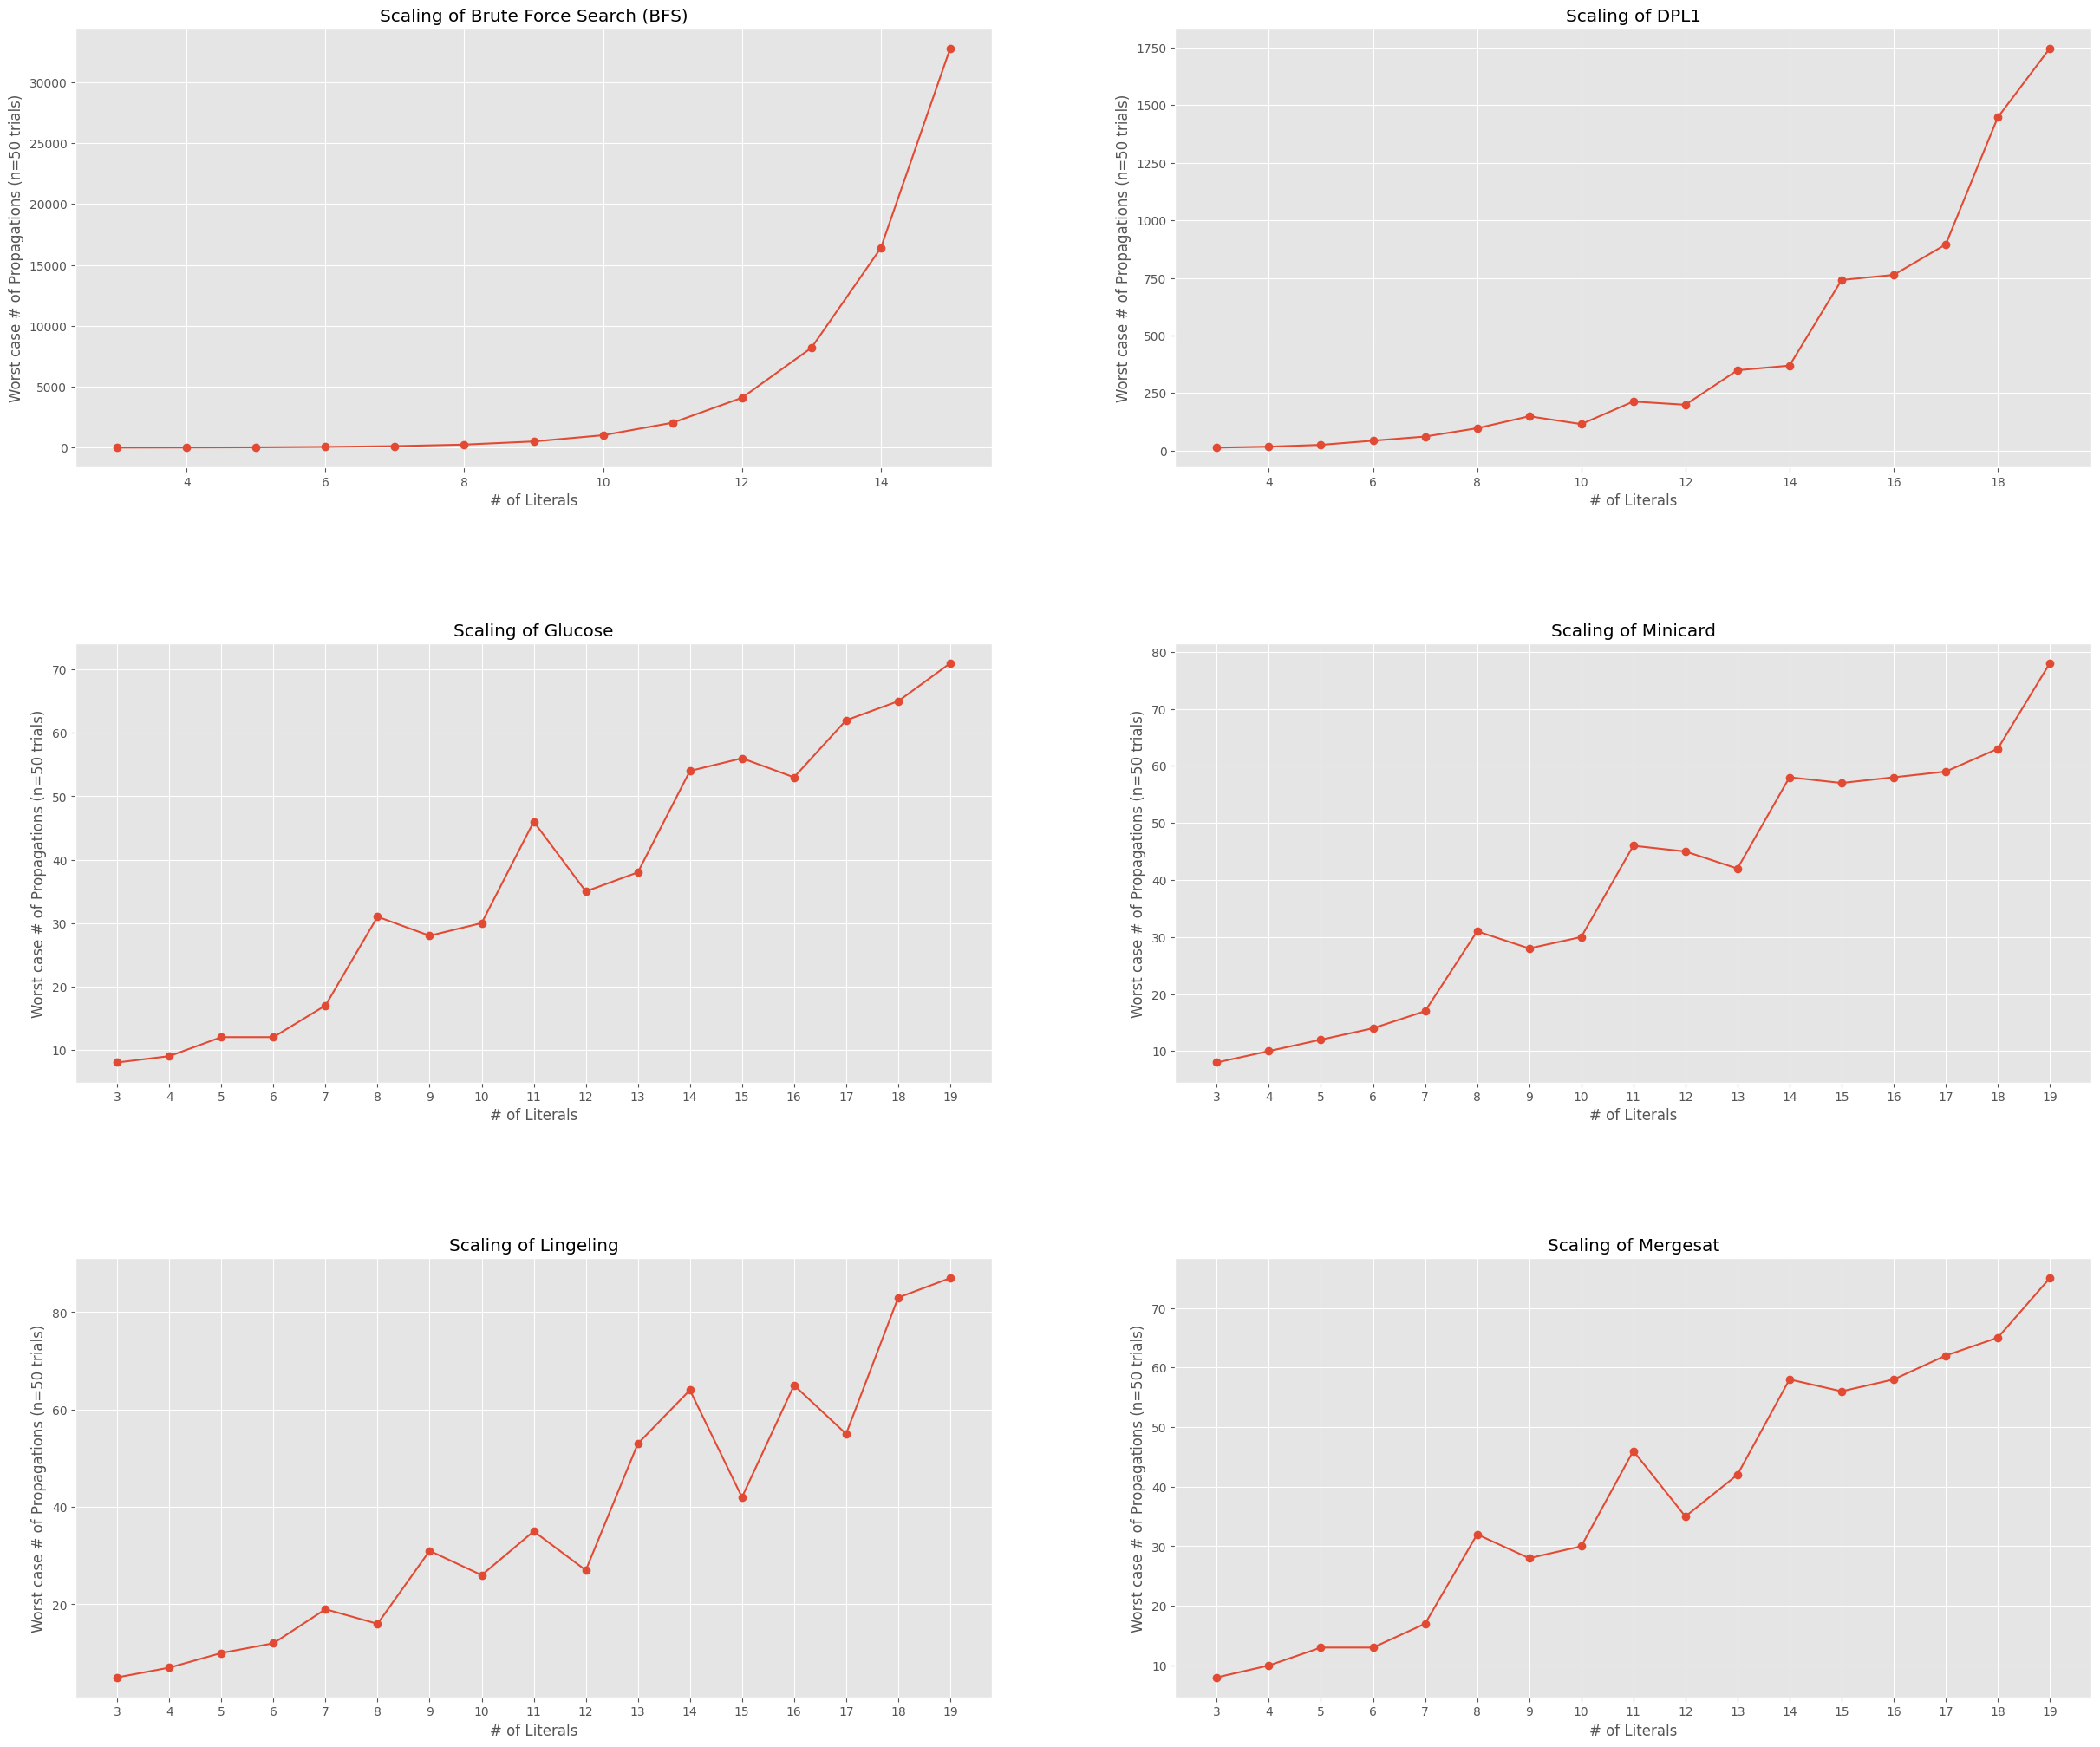

In [5]:
import matplotlib.pyplot as plt


plt.style.use('ggplot')

fig, axes = plt.subplots(3,2, figsize = (30,25))
a = 3; SOLVER = 'Glucose'

axes[0,0].plot(literals[:len(brute_force_times)], brute_force_times[:MAX_LITERALS], 'o-', label = "BFS Iterations")
axes[1,0].set_xticks(literals[:len(brute_force_times)])
#axes[0,0].plot([2**x for x in range(len(brute_force_times))], alpha = 0.8, linestyle = '--')

axes[0,1].plot(literals[:len(dpll_times)], dpll_times, 'o-',  label = "DPLL Iterations")
axes[1,0].set_xticks(literals[:len(dpll_times)])
#axes[0,1].plot([1.2**x for x in range(len(dpll_times))], alpha = 0.8, linestyle = '--')

axes[1,0].plot(literals, glucose_times,  'o-')
axes[1,0].set_xticks(literals)
#axes[1,0].plot([1.2**x for x in range(len(glucose_times))], alpha = 0.8, linestyle = '--')

axes[1,1].plot(literals, cadical_times, 'o-')
axes[1,1].set_xticks(literals)
#axes[1,1].plot([1.2**x for x in range(len(cadical_times))], alpha = 0.8, linestyle = '--')

axes[2,0].plot(literals, ms_times, 'o-')
axes[2,0].set_xticks(literals)

#axes[2,0].plot([1.2**x for x in range(len(ms_times))], alpha = 0.8, linestyle = '--')

axes[2,1].plot(literals, maple_times, 'o-')
axes[2,1].set_xticks(literals)

#axes[2,1].plot([1.2**x for x in range(len(maple_times))], alpha = 0.8, linestyle = '--')


#axes[0,0].yaxis.set_ticklabels([]);
axes[0,0].set_title("Scaling of Brute Force Search (BFS)")
#axes[0,1].yaxis.set_ticklabels([]);
axes[0,1].set_title("Scaling of DPL1")
#axes[1,0].yaxis.set_ticklabels([]); 
axes[1,0].set_title("Scaling of Glucose")
#axes[1,1].yaxis.set_ticklabels([]); 
axes[1,1].set_title("Scaling of Minicard")
axes[2,0].set_title("Scaling of Lingeling")
axes[2,1].set_title("Scaling of Mergesat")

axes[0,0].set_ylabel("Worst case # of Propagations (n=50 trials)")
axes[0,1].set_ylabel("Worst case # of Propagations (n=50 trials)")
axes[1,0].set_ylabel("Worst case # of Propagations (n=50 trials)")
axes[1,1].set_ylabel("Worst case # of Propagations (n=50 trials)")
axes[2,0].set_ylabel("Worst case # of Propagations (n=50 trials)")
axes[2,1].set_ylabel("Worst case # of Propagations (n=50 trials)")

axes[0,0].set_xlabel("# of Literals")
axes[0,1].set_xlabel("# of Literals")
axes[1,0].set_xlabel("# of Literals")
axes[1,1].set_xlabel("# of Literals")
axes[2,0].set_xlabel("# of Literals")
axes[2,1].set_xlabel("# of Literals")


fig.subplots_adjust(hspace = 0.4)
#axes.scatter([x[0] for x in points], [x[1] for x in points])
#axes.set_title("Evaluation of " + str(a) + "-SAT problems using " + SOLVER)
#axes.set_xlabel("Number of Conjuncts")
#axes.set_ylabel("Time (seconds)")

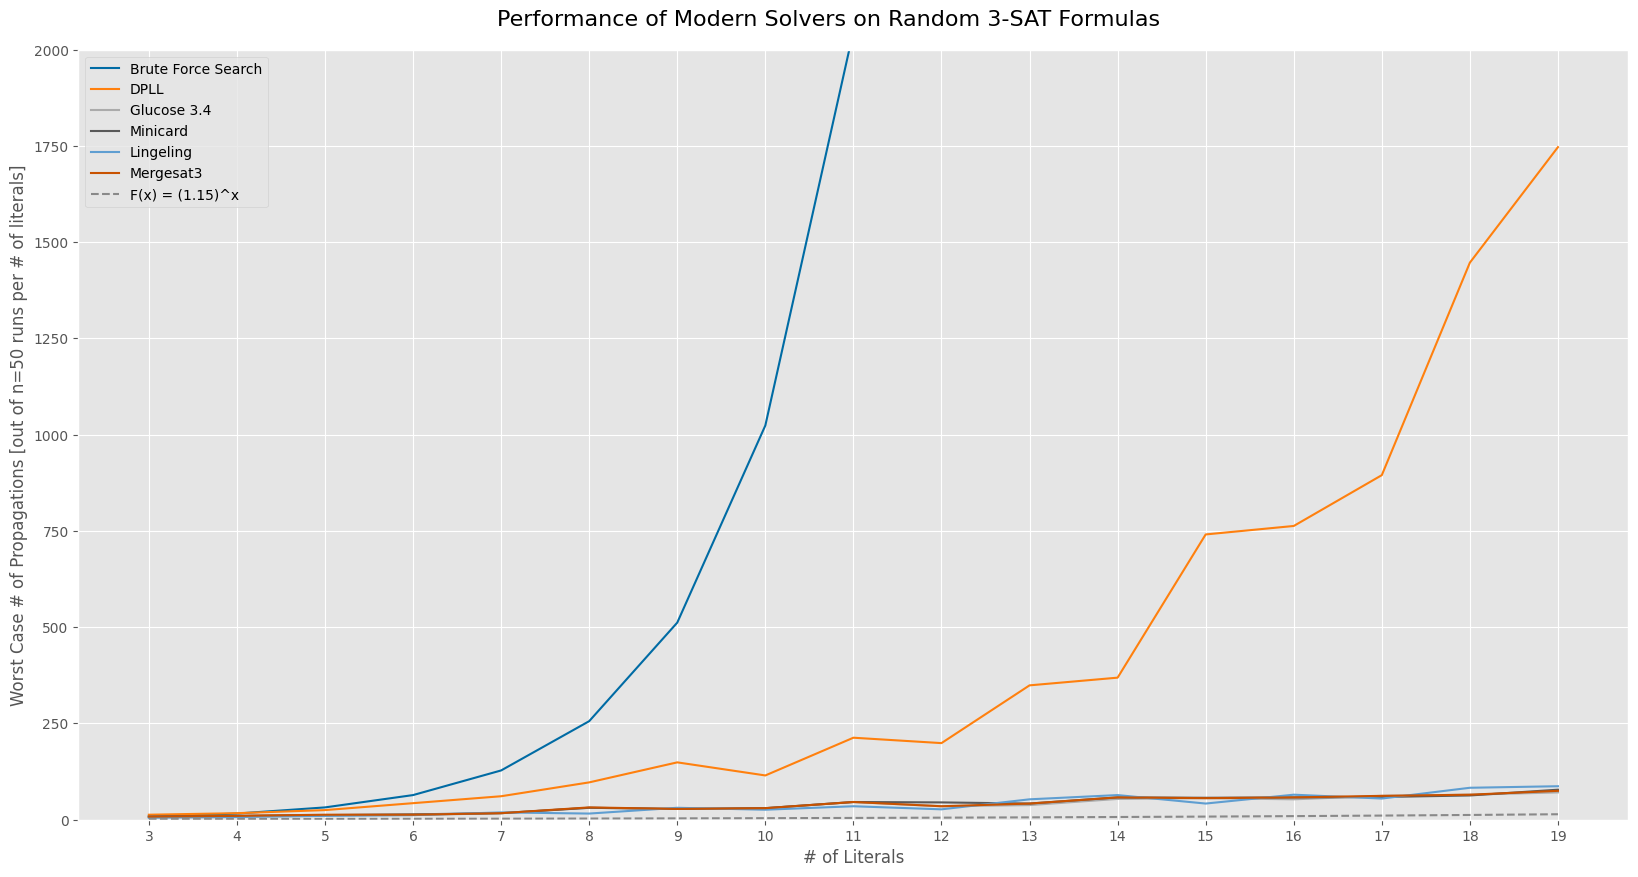

In [6]:
plt.style.use('tableau-colorblind10')
fig, axes = plt.subplots(figsize = (20,10))

axes.plot(literals[:len(brute_force_times)], brute_force_times, label = "Brute Force Search")
axes.plot(literals[:len(dpll_times)], dpll_times, label = "DPLL")
axes.plot(literals[:len(glucose_times)], glucose_times, label = "Glucose 3.4")
axes.plot(literals, cadical_times, label = "Minicard")
axes.plot(literals, ms_times, label = "Lingeling")
axes.plot(literals, maple_times, label = "Mergesat3")
axes.plot(literals, [1.15**n for n in literals], linestyle = '--', label = "F(x) = (1.15)^x")
axes.set_ylim(0, 2000)
axes.set_xlabel("# of Literals")
axes.set_ylabel("Worst Case # of Propagations [out of n=50 runs per # of literals]")
axes.set_xticks(literals)
plt.suptitle("Performance of Modern Solvers on Random 3-SAT Formulas", fontsize = 16, y= 0.92)
#plt.title("Worst Case out of n=100 runs per # of literals", fontsize = 10, y = 0.99)


axes.legend()

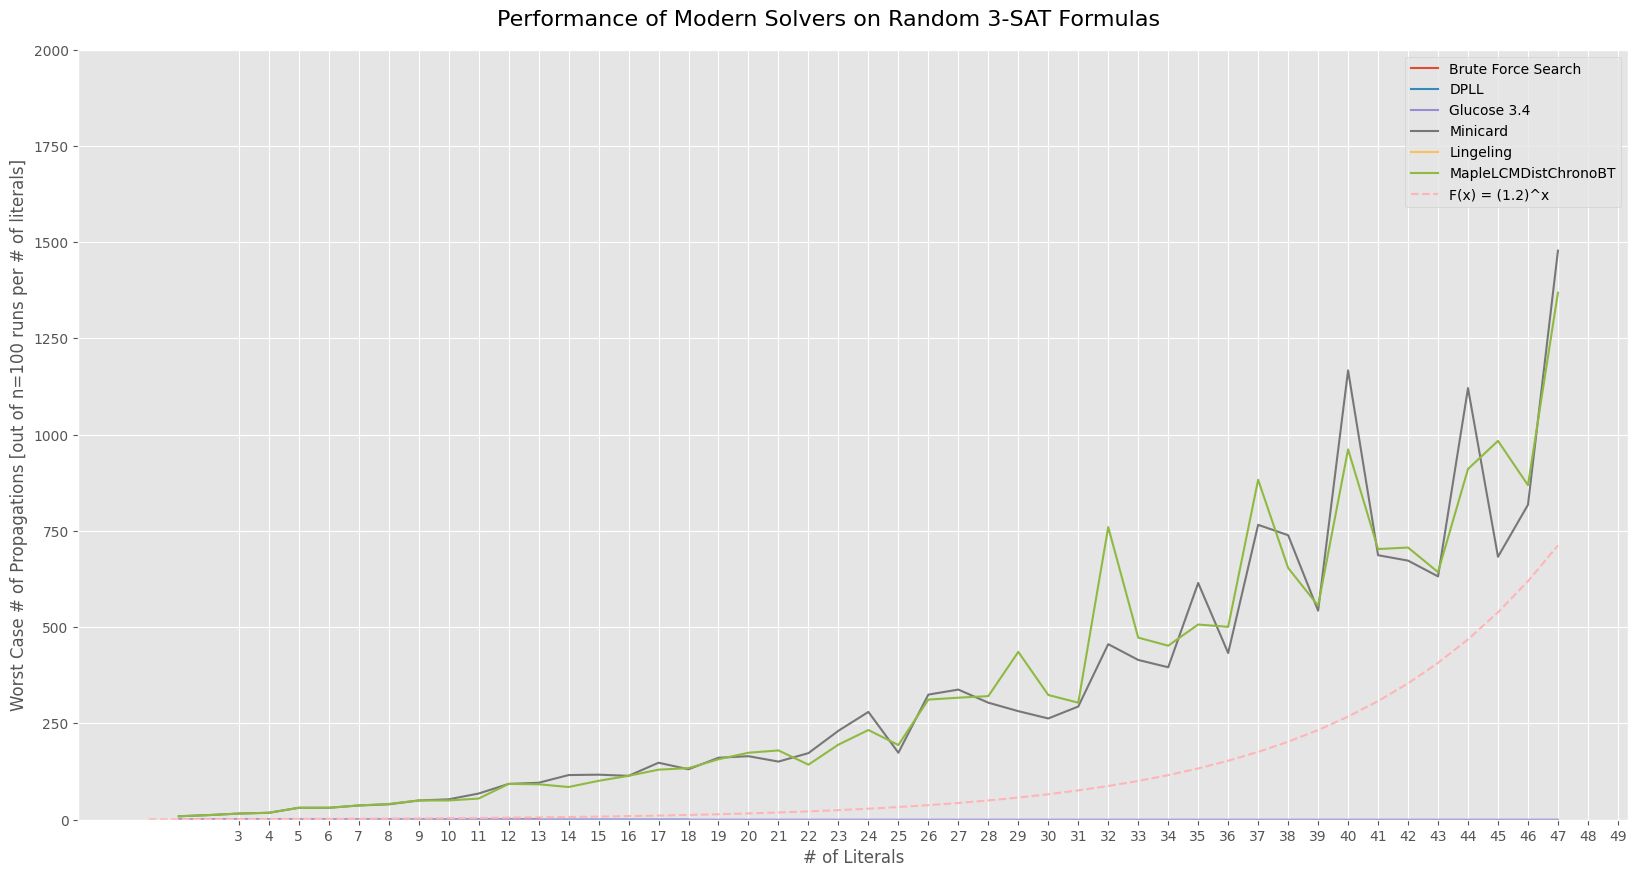

In [30]:
fig, axes = plt.subplots(figsize = (20,10))

axes.plot(list(range(1,len(brute_force_times)+1)), brute_force_times, label = "Brute Force Search")
axes.plot(list(range(1,len(dpll_times)+1)), dpll_times, label = "DPLL")
axes.plot(list(range(1,len(glucose_times)+1)), glucose_times, label = "Glucose 3.4")
axes.plot(list(range(1,len(cadical_times)+1)), cadical_times, label = "Minicard")
axes.plot(list(range(1,len(lg_times)+1)), lg_times, label = "Lingeling")
axes.plot(list(range(1,len(maple_times)+1)), maple_times, label = "MapleLCMDistChronoBT")
axes.plot([1.15**n for n in range(len(maple_times)+1)], linestyle = '--', label = "F(x) = (1.2)^x")
axes.set_ylim(0, 2000)
axes.set_xlabel("# of Literals")
axes.set_ylabel("Worst Case # of Propagations [out of n=100 runs per # of literals]")
axes.set_xticks(literals)
plt.suptitle("Performance of Modern Solvers on Random 3-SAT Formulas", fontsize = 16, y= 0.92)
#plt.title("Worst Case out of n=100 runs per # of literals", fontsize = 10, y = 0.99)


axes.legend()

<h3>$(\neg A \lor B \lor C) \land$</h3>
<h3>$(A \lor B \lor \neg D) \land$</h3>
<h3>$(\neg B \lor \neg C \lor \neg D) $</h3>